# Declining cities in Eastern Europe and Central Asia

#### Programming Tools for Urban Analytics, Univeristy of Glasgow

##### 30.03.2020


## Introduction

The aim of the current analysis is to identify cities in Eastern European and Central Asian (**ECA**) countries which have been declining despite the rapid urbanisation processes worldwide. The region was chosen for this study due countries' shared legacy of state-controlled policies on cities and the fact that these countries are often neglected in the literature. This can be due to a number of reasons, such as the historical 'unnatural' influences on urbanisation under planned economies, the relatively slow growth of cities in the region, and the remoteness of these areas from the relatively centralised academic environment. 

While conducting spatial analyses such as spatial clustering or spatial regression would undoubtedly reveal some very interesting patterns, k means cluster analysis was chosen as the method to study the pattern of declining – and growing – cities in the ECA region. Using unsupervised cluster analysis allows one to identify important city characteristics that are likely to influence urbanisation, regardless of location. 
Instead of manually creating categories for countries with labels such as ‘Eastern European’ or ‘post-Soviet’, k means clustering is used to find clusters based on a selected number of features. This means that the algorithm can group cities with similar attributes even if they are not close to each other spatially. This opens up the possibility for city administrations to  learn from each other ways to tackle the challenges posed by declining cities, a ubiquitous phenomenon in the region. 

The dataset used for the analysis is from the Word Bank’s ‘Cities in Europe and Central Asia: a shifting story of urban growth and decline’ database from 2017 (http://documents.worldbank.org/curated/en/319131510892209158/Cities-in-Europe-and-Central-Asia-a-shifting-story-of-urban-growth-and-decline). This contains 13 countries and 5547 cities. The dataset covers urban change between the periods of 1996 and 2010.  


In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [165]:
df=pd.read_csv('md-city-database_2.csv')

In [6]:
len(df)

5549

In [7]:
df.describe()

lat          lng  monotowns        year1        year2  \
count  5548.000000  5548.000000      224.0  2878.000000  5549.000000   
mean     48.581666    29.386134        1.0  1989.731411  2000.791854   
std       6.125596    23.703775        0.0     1.039602     0.895051   
min      35.902500    -7.309340        1.0  1989.000000  1999.000000   
25%      43.238077    11.678315        1.0  1989.000000  2000.000000   
50%      50.044215    26.837300        1.0  1989.000000  2001.000000   
75%      52.745390    38.392583        1.0  1991.000000  2001.000000   
max      69.692947   177.496827        1.0  1992.000000  2003.000000   

             year3         cen_1         cen_2         cen_3      agglpop1  \
count  5549.000000  2.712000e+03  5.523000e+03  5.512000e+03  9.110000e+02   
mean   2012.054785  7.251571e+04  6.110522e+04  6.491422e+04  3.895026e+06   
std       1.538578  2.709328e+05  2.597381e+05  3.182690e+05  4.571598e+06   
min    2010.000000  0.000000e+00  1.510000e+02  1.000000e+02  6.219000e+03   
25%    2011.000000  1.395825e+04  1.284850e+04  1.219650e+04  2.336760e+05   
50%    2012.000000  2.547600e+04  2.238900e+04  2.214200e+04  1.319181e+06   
75%    2014.000000  5.313125e+04  4.446450e+04  4.518750e+04  9.898738e+06   
max    2015.000000  8.677177e+06  1.012642e+07  1.371051e+07  1.193070e+07   

       ...         mp_10          mpp_1         mpp_2         mpp_3  \
count  ...  5.548000e+03    5548.000000  5.548000e+03  5.548000e+03   
mean   ...  1.117698e+06   52416.581686  1.233428e+05  1.304141e+05   
std    ...  2.297494e+06   68727.919281  1.317758e+05  1.327853e+05   
min    ...  1.278108e+02       0.000000  4.354448e+03  5.329481e+03   
25%    ...  5.003535e+03       0.000000  6.909933e+04  6.827407e+04   
50%    ...  1.214917e+05   13250.880859  1.130551e+05  1.176325e+05   
75%    ...  6.108657e+05  100135.503906  1.513217e+05  1.706508e+05   
max    ...  1.765729e+07  752852.375000  8.154558e+06  7.943540e+06   

           mpg_1_2      mpg_2_3      mpg_1_3     mppg_1_2     mppg_2_3  \
count  5548.000000  5548.000000  5548.000000  2878.000000  5548.000000   
mean     -0.105254     0.815072     0.613853     0.032398     0.054543   
std       0.256296     0.367322     0.538176     0.105827     0.122817   
min      -0.890280    -0.292333    -0.832781    -0.441486    -0.140489   
25%      -0.204987     0.558749     0.360855    -0.038474    -0.013389   
50%      -0.058784     0.790861     0.600554     0.014567     0.007916   
75%       0.084654     1.031473     0.886744     0.080774     0.079156   
max       0.482029     2.614456     2.110008     0.624581     0.772607   

          mppg_1_3  
count  2878.000000  
mean      0.064008  
std       0.158718  
min      -0.467086  
25%      -0.046629  
50%       0.028149  
75%       0.223981  
max       0.820548  

[8 rows x 102 columns]

The countries chosen by the Wold Bank cover a large area, from Central Europe to the East Asia. The countries share a somewhat common historical legacy, even if they cannot be categorised into one group. Instead, they are often divided into subregions (Spoor, 2011):

o	Southeast Europe (**SEE**): Albania, Bosnia and Herzegovina, Croatia, Kosovo, Serbia, Montenegro, former Yugoslav Republic of Macedonia

o	Central and Eastern Europe (**CEE**): Baltic Countries (Estonia, Latvia, Lithuania, Bulgaria, Czechia, Hungary, Poland, Romania, Slovakia, Slovenia (EU member states)

o	Commonwealth of Independent States (**CIS**) and Georgia. Russia, Belarus, Moldova, Ukraine, Azerbaijan, Armenia, Georgia

o	Central Asia: Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenistan, Uzbekistan

The plot below shows the number of cities in each country. 


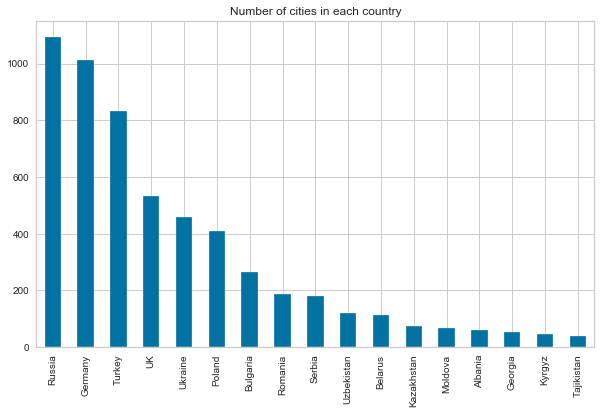

In [273]:
df.country.value_counts().plot(kind='bar', figsize=(10,6), title= 'Number of cities in each country')

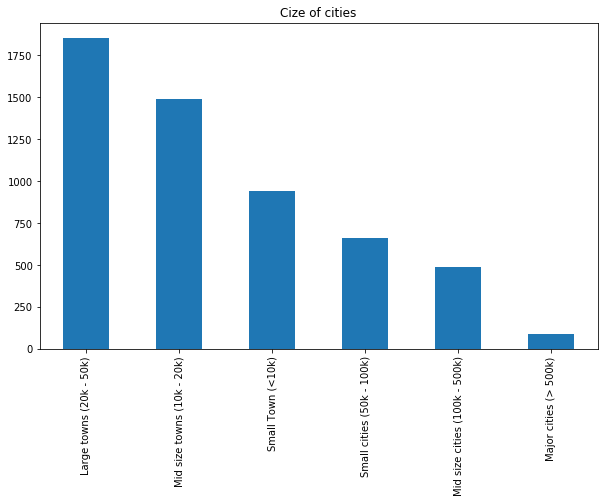

In [216]:
df['poptype2'].value_counts().plot(kind='bar', figsize=(10,6), title= 'Cize of cities')

## Literature Review

### Urbanisation processes

To understand the reasons behind the trend of declining cities in ECA countries first we need to look at their urbanisation processes. There is a ubiquitous tendency for unbalanced growth in the region, driven by state-led policies. The countries’ urbanisation processes are are often categories into spatially and secotorally unbalanced ones (CEE and SEE countries) and ‘growth-pole’-based ones (CIS and post-Soviet countries). 

### Cluster Analysis

Clustering occurs naturally in most datasets, even if it is not apparent for the first sight. The aim of clustering is to find groupings so that similarity within a cluster is big and similarities within multiple cluster are small. For this analysis a partitioning method will be used instead of hierarchical clustering. Partitining splits the dataset into a certain number of groups and assigns the points to the nearest cluster centroid. Generally, there is no ‘correct’ number of clusters (Grus, 2016). There are various algorithms one can use try to find clusters of similar input variables. Different methods can lead to different clusters, as can different measures of distance (Aldenderfer and Blashfield, 1984). K means is one of the simplest unsupervised learning algorithms. It requires the specification of *k*, and it tries to find the smallest squared distanced from each point to the cluster means (Grus, 2016). 

Clustering methodology has been used to classify countries in the region before. For example, Soaita and Dewilde (2017) used cluster analysis to understand the housing systems of post-socialist countries. They found that the contemporary housing system of a given country depended on its historical policies, indicating the importance of path-dependence in housing and urban planning. The scope of this analysis is broader than that of Soaita’s and Dewilde’s (2017), as the focus is on cities rather than countries, which are smaller administrative units. Also, the countries in this analysis span from Eastern European countries to the whole of Central Asia. Germany and the UK – the only Western countries in the dataset – are used as weights, just as suggested by the Word Bank. 



## Maps

The map below shows countries plotted against their longitude and latitude. We can see that the density of sampled cities is higher in Western and European countries.  

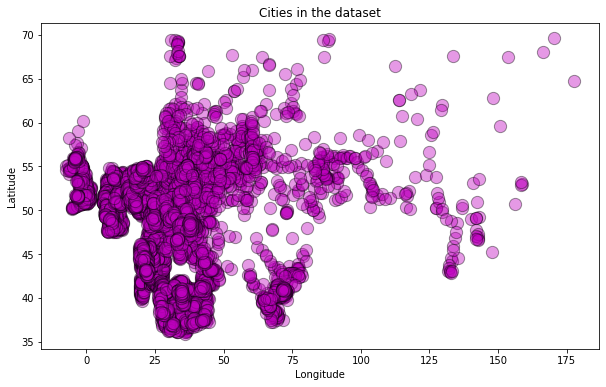

In [197]:
from matplotlib import rc, font_manager
from numpy import arange, cos, pi
from matplotlib.pyplot import figure, axes, plot, xlabel, ylabel, title, \
grid, savefig, show
import cartopy.crs as ccrs


fig, ax = plt.subplots()

fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x=df['lng'], y=df['lat'], c='m', edgecolor='k', alpha=.4, s=150)
ticks_font = font_manager.FontProperties(style='normal',
    size=10, weight='normal', stretch='normal')

# set font of tick labels
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

# set title, axis labels, background color
ax.set_title('Cities in the dataset')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# annotate each of the most visited cities on the map
bbox_style = {'boxstyle':'round', 'color':'k', 'fc':'w', 'alpha':0.8}
arrowprops_style = {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'k', 'alpha':0.8}
annotate_cities = lambda row: ax.annotate(row['city'], 
                                          xy=(row['lng'], row['lat']),
                                          xytext=(row['lng'] + 1, row['lat'] + 1),
                                          fontproperties=annotation_font,
                                          bbox=bbox_style,
                                          xycoords='data',
                                          arrowprops=arrowprops_style)
    
plt.show()

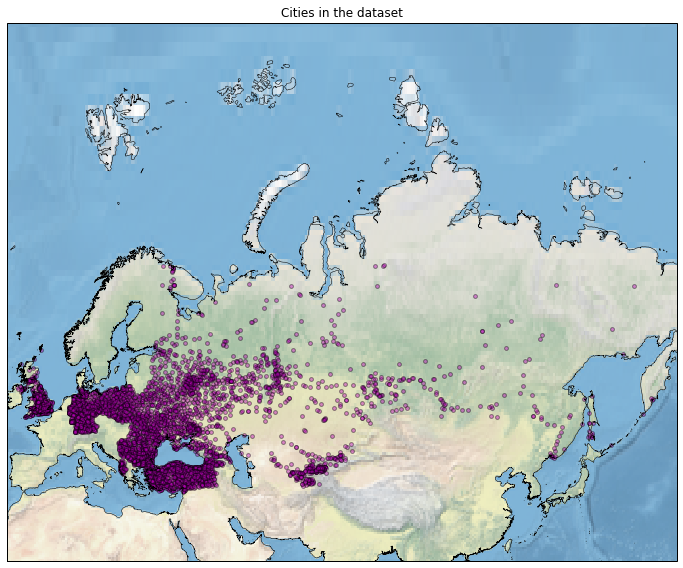

In [196]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(12, 12))
ax = fig.subplots()

ax = plt.axes(projection=ccrs.Mercator(globe=ccrs.Globe(datum='WGS84')))
ax.coastlines(resolution='10m', linewidth=0.5)

ax.set_extent((-10, 165, 20, 20))
plt.scatter(df['lng'], df['lat'], c='m', edgecolor='k', alpha=.4, s=15, transform=ccrs.Geodetic())  # Plot
ticks_font = font_manager.FontProperties(style='normal',
    size=10, weight='normal', stretch='normal')
ax.stock_img()
# set font of tick labels
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

# set title, axis labels, background color
ax.set_title('Cities in the dataset')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# annotate each of the most visited cities on the map
bbox_style = {'boxstyle':'round', 'color':'k', 'fc':'w', 'alpha':0.8}
arrowprops_style = {'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 'color':'k', 'alpha':0.8}
annotate_cities = lambda row: ax.annotate(row['city'], 
                                          xy=(row['lng'], row['lat']),
                                          xytext=(row['lng'] + 1, row['lat'] + 1),
                                          fontproperties=annotation_font,
                                          bbox=bbox_style,
                                          xycoords='data',
                                          arrowprops=arrowprops_style)
    
plt.show()


An interactive map is also included using Open Street Map to allow one to zoom in to the exact location of cities.

In [166]:
df= df.dropna(subset=['lng', 'lat'])

In [319]:
import folium
from folium import plugins
centre = (61.5, 105.3)
m = folium.Map([61.5, 105.3], zoom_start=11)

for index, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['lng']],
                        radius=2,
                        fill_color="#3db7e4",
                       ).add_to(m)
    
    
cities = df[['lat', 'lng']].values
m.add_child(plugins.HeatMap(cities, radius=1))
m

## Exploratory analysis

### Population loss

There are several important factors that determine whether a city is likely to grow or decline. As mentioned before, the majority of cities in the dataset are shrinking. To see the changes in population between 2000 and 2010 a new variable is created from the countries' census data. Less, than 40% of cities experienced a population increase during this period. The barplot below shows the mean change for cities in each country. Central Asian countries (especially Kazakhstan, Tjikistan, and Uzbekistan) seem to stand out. On the other hand, Eastern European EU memeber states (such as Romania or Bulgaria) have been experiencing population loss to emigartion to other EU countries. CIS countries have had a similar experience, especially in Ukraine. Ukrainians today are one of the biggest third-country nationals living in EU countries (primarily in Italy) (Fedyuk and Kindler, 2016).


In [209]:
df['popchange'] = df['cen_3']/df['cen_2']

In [210]:
sum(df['popchange'] < 1)/ len(df)

0.605803893294881

Text(0, 0.5, 'Ratio')

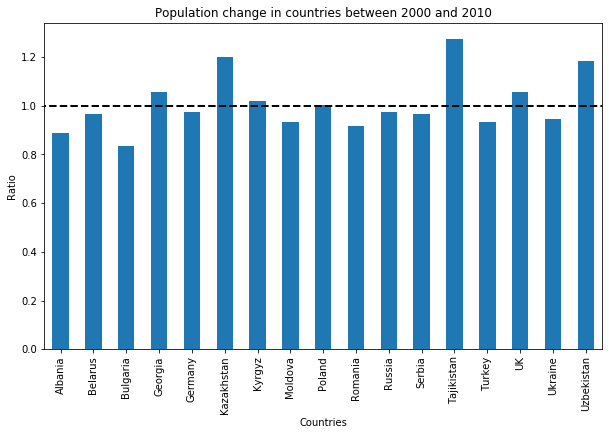

In [211]:
x= df.groupby('country').mean()['popchange']
x.plot(kind='bar', figsize=(10,6))
plt.hlines(y=1, xmin=-1, xmax=len(x), linestyles='--', lw=2)
plt.title('Population change in countries between 2000 and 2010')
plt.xlabel('Countries')
plt.ylabel('Ratio')

### Market potential

An other important factor that determines whether a city is likely to grow is the market potential measured using night lights (NLS). The lack of subregional data on economic performance requires NLS to be a widely used proxy of economic activity as a positive and significant correlation has been found between GDP and cities' nighttime lights (radiance omitted).  

A city's market potential is determined by access to other, neighbouring markets (Word Bank, 2017). This measure is often used in trade literature. It measures travel time  between the city compared to all other cities in the country relative to population. Generally speaking, higher market potential means proximity to at least one larger city. Low and negative values indicate low market potential and significant distance to cities. 

Since this analysis aims to understand changes over time, instead of using a single value the ratio of measured market potential sis used for the period of 2000 and 2010. The figure below shows the ratio for every country in the dataset. Similarly to population, Central Asian countries performed better than the rest, especially compared to Easter European countries.  


Text(0, 0.5, 'Ratio')

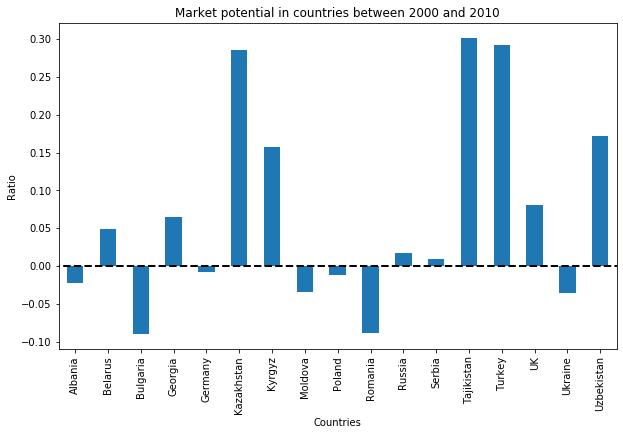

In [201]:
x= df.groupby('country').mean()['mppg_2_3']
x.plot(kind='bar', figsize=(10,6))
plt.hlines(y=0, xmin=-1, xmax=len(x), linestyles='--', lw=2)
plt.title('Market potential in countries between 2000 and 2010')
plt.xlabel('Countries')
plt.ylabel('Ratio')

### Typology

Population and market potential are the two most important factors of city growth and decline. However, they cannot be used on their own to determine whether a city has been declining, as population loss does not necessarily imply economic loss as well. To understand how cities have performed in each country between 2000 and 2010 a classification was developed by the Word Bank using the above mentioned two indicators. They defined 4 categories:

**1.** Growing population and growing economic activity

**2.** Declining population and declining economic activity

**3.** Growing population and declining economic activity

**4.** Declining population and growing economic activity

The share of cities in each country is shown on the plot below, followed by the sum of each category.

As expected, most cities with a declining population (categories 2 and 4) are SEE and CEE countries, and growing population Central Asian ones. Most cities in the dataset have a 'dimming core' with growing market potential but population loss (Category 4).


Text(0.5, 1.0, 'Country typology based on popultion and economic activity')

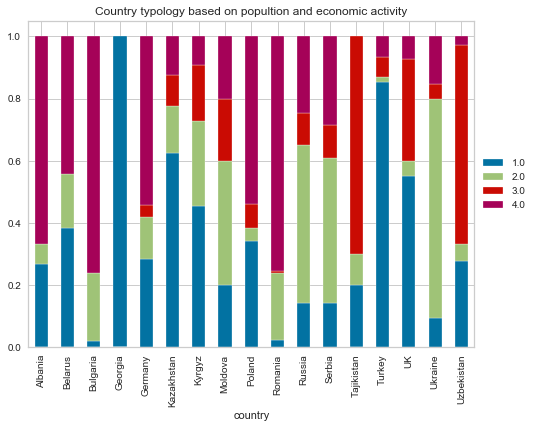

In [282]:
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot()

country_population = df[['country', 'class_b', 'city']].groupby(['class_b', 'country']).count().reset_index().pivot(index='country', columns='class_b', values='city').fillna(0)
country_sum = country_population[1.0] + country_population[2.0] + country_population[3.0] + country_population[4.0]
country_population.div(country_sum, axis=0).plot(kind='bar', stacked=True, ax=ax)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Country typology based on popultion and economic activity')

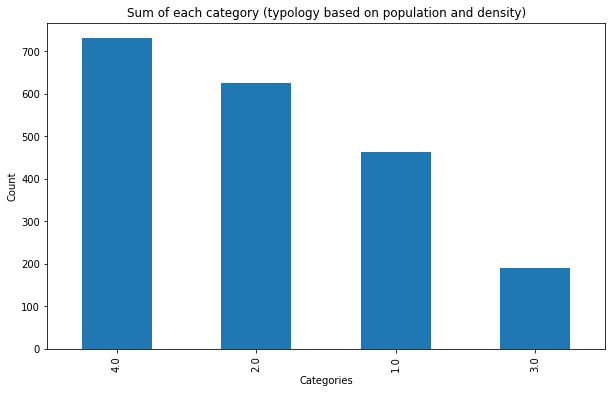

In [206]:
x =df.class_b.value_counts()
x.plot(kind='bar', figsize=(10,6))
plt.title('Sum of each category (typology based on population and density)')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

### Data cleaning 

When we look at highest ratio of population change we see an outlier, Magas in Russia, which appears to be a new city according to the 1996 census (cen_1). In 2000 it had 275 inhabitants, while in 2010 the population grew to 2500. When Magas is identified on the map it becomes clear that it is an agglomeration to the city of Magas, the capital of the Ingushetia region. The second biggest population increase for cities is three times the size of the population in 2000 (Şırnak Merkez, the South East of Turkey), which is followed by Ôtegen batyr, the outskirt of Almati. We can see that the biggest population increase happened mostly in agglomerations. Since the Russian city appears to be an outlier it is subsequently removed from the dataset.

In [220]:
df[['country', 'popchange', 'city']].groupby('country').max()

popchange           city
country                             
Albania      1.967517           VORE
Belarus      1.252478       cacersk 
Bulgaria     1.272203      Zlatograd
Georgia      1.435956        Zugdidi
Germany      1.334183     uberlingen
Kazakhstan   2.598016  Ôtegen batyr 
Kyrgyz       1.338583      Zhirgalan
Moldova      1.231884     Vulcanesti
Poland       1.321625     Złocieniec
Romania      1.877404       tandarei
Russia       9.098182        myshkin
Serbia       1.383978       Zvezdara
Tajikistan   1.785714      Zafarobod
Turkey       3.086045  Şırnak Merkez
UK           1.426032           York
Ukraine      1.315135      Zymohiria
Uzbekistan   1.829268      Zarafshan

In [219]:
print(df.loc[df['popchange'].idxmax()])

country                   Russia
uniqueid                  RU37.2
nuts1                        NaN
nuts2        Ingushetia Republic
nuts3                        NaN
                    ...         
mpg_1_3                 0.704949
mppg_1_2                0.039478
mppg_2_3               0.0233502
mppg_1_3               0.0637501
popchange                9.09818
Name: 2750, Length: 121, dtype: object


In [222]:
df=df.drop(df['popchange'].idxmax()) 

### Location fundamentals 
Other important factors that determine city decline are geographical position and natural amenities. Being close to the coast is positively correlated with population increase. They are also likely to have better access to international markets (Word Bank, 2017). 

Higher temperature is also associated with better economic output. Instead of using mean annual temperature in cities – which does not take seasonality into account – the average temperature in January is used as an indicator. Another important location fundamental is annual precipitation. The Word Bank (2017) found that cities with less attractive location fundamentals (lower average temperature, heavy rainfalls, and large distances to coast and international borders) tend to be smaller and are more likely to loose population. Also, these cities tend to be so-called 'monotowns' with a specialised  economy. (Monotowns are the result of forced state intervention, when the city's whole economy depended on one or very few enterprises (Maksimova, 2015). After the fall of the Soviet Union these towns fall into recession.)



In [250]:
#countries with mean population change and change in market potential (2000-2010)
df[['country', 'popchange', 'mppg_2_3']].groupby('country').mean()
#how to visualise this better?

popchange  mppg_2_3
country                        
Albania      0.889531 -0.023021
Belarus      0.964666  0.049109
Bulgaria     0.833675 -0.090421
Georgia      1.055217  0.065101
Germany      0.975246 -0.007476
Kazakhstan   1.201313  0.285836
Kyrgyz       1.020490  0.157449
Moldova      0.934429 -0.034880
Poland       1.004486 -0.012217
Romania      0.915659 -0.088469
Russia       0.966213  0.016595
Serbia       0.966353  0.009740
Tajikistan   1.276426  0.301750
Turkey       0.934674  0.292874
UK           1.057742  0.080593
Ukraine      0.943777 -0.035607
Uzbekistan   1.186135  0.171478

### K Means Cluster Analysis

For the cluster analysis only a subset of the data is used. The selected number of cariables in the dataset are the following:

o the ratio of population change between 2000 and 2010

o change in market potential

o distance to nearest international border

o distance to coast

o average temperature in Januaray

o annual precipiation




In [237]:
df2_columns = ['mppg_2_3', 'dis_coast', 'jantemp', 'dis_border', 'annprecip', 'popchange']

In [238]:
#create a subset of the data to test correlation
#use the time difference between 2000 and 2010 to be consistent with population change
df2=df.loc[:, df2_columns]
df2.head()

mppg_2_3  dis_coast  jantemp    dis_border  annprecip  popchange
0 -0.004343    34886.2  7.47670  64409.757964   1028.700   0.701519
1 -0.011076    41928.1  7.47670  68381.750502   1028.700   0.828701
2 -0.040773    54419.7  0.78667  60764.365053    969.109   0.651970
3 -0.007513    33362.4  7.47670  69060.039902   1028.700   0.787714
4 -0.035342    59941.0  0.78667  47003.455433    969.109   0.618851

#### Correlation matrix

Below we can see the correlation matrix of the variables in the dataset. The highest, negative correlation are between distance to coast and borders, and average January temperatures. Population change is positively correlated with higher temperatures and growing market potential. 

To further analyse the relationship between these variables a pair plot is included below, which plots all variables against each other.

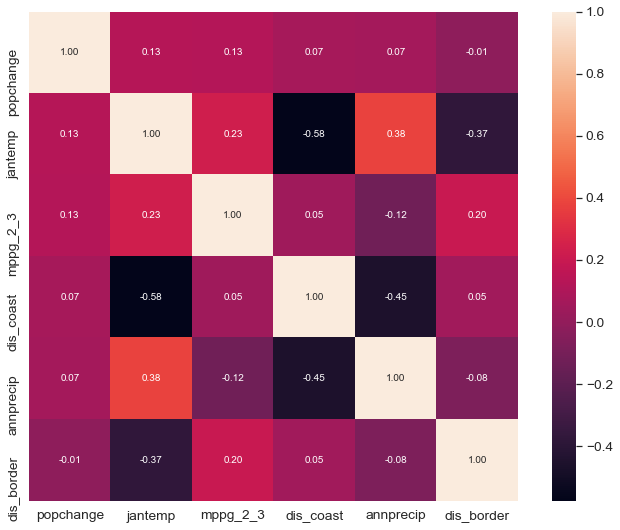

In [248]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 6
cols = corrmat.nlargest(k, 'popchange')['popchange'].index 
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

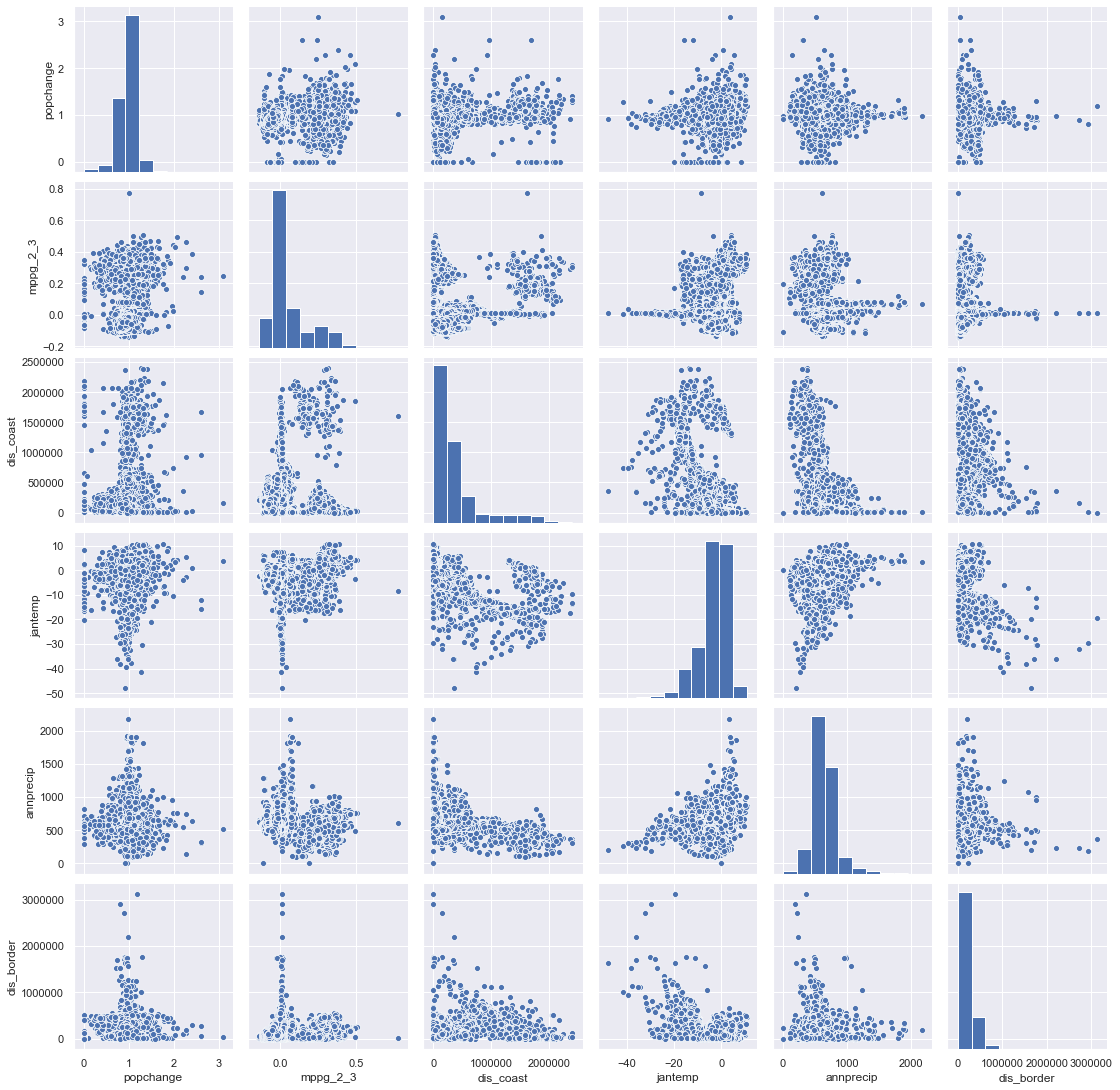

In [251]:
sns.set()
cols = ['popchange', 'mppg_2_3', 'dis_coast', 'jantemp', 'annprecip', 'dis_border']
sns.pairplot(df2[cols])
plt.show();

#### Clustering 

For the cluster analysis KMeans is used from the Sklearn Python library. Since this is a partitioning method the number of clusters need to be specified. To do this one look at an elbow plot. As Tibshirani et al. (2001) states, according to the 'statistical folklore', where the ‘elbow’ falls on the plot, there lies the appropriate number of groups in the data. The calculation is done using the distortion score and the fit line for each *k*. Looking at the elbow plot this analysis proceeds with four clusters. 


In [252]:
df2= pd.DataFrame(df2).fillna(0)

/Users/reka/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


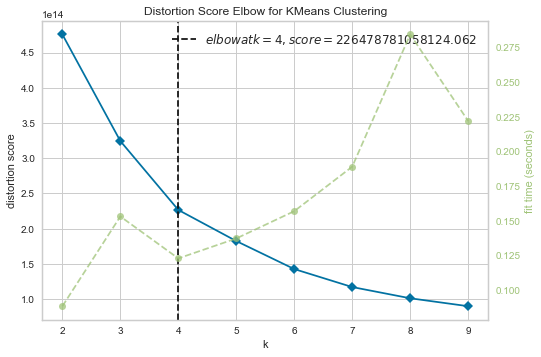

/Users/reka/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a30bdb490>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

In [254]:
from sklearn.cluster import KMeans
import yellowbrick
from yellowbrick.cluster.elbow import kelbow_visualizer

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), df2, k=(2,10))

In [261]:
from sklearn.cluster import KMeans
model =KMeans(n_clusters=4)
model.fit(df2)
labels=model.predict(df2)

We can visually inspect the outcome of the clustering. The plot below shows the clusters plotted against two variables. There does seem to be a good division between the cluster based on these two variables. 

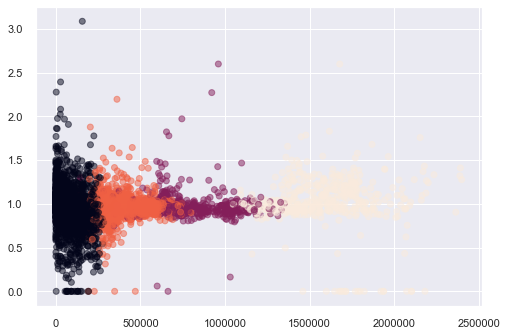

In [287]:
sns.set()

xs=df2[:,1]
ys=df2[:,5]

plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.show()


To understand the groups in the dataset better the centroids of the clusters are plotted over the same plot.

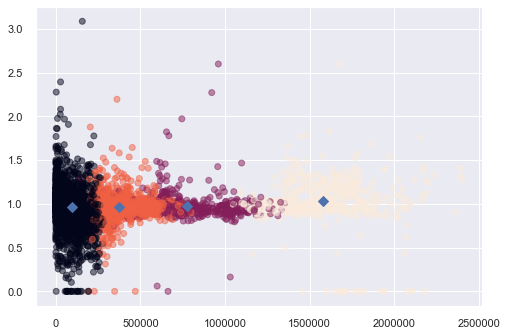

In [289]:
plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids=model.cluster_centers_
centroids_x=centroids[:, 1]
centroids_y=centroids[:, 5]

plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


### Pipeline

To simplify the steps taken above a pipeline can be created. This speeds up the process for future runs as it only has be fitted over the dataset we want to use the clustering on. A preprocessing step is also added to this pipeline in case the model is used on a dataset that is not normalised. The Normalizer rescales every sample individually to have a unit norm for the data. 

In [291]:
#normalizer rescales each sample independently of the other
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
normalizer= Normalizer()
kmeans=KMeans(n_clusters=4)
pipeline=make_pipeline(normalizer, kmeans)
pipeline.fit(df2)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=4, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

Following the analysis the outcome of the clustering is added to the original dataset so the clusters can be identified and analysed. First, the outcome is saved as 'cluster_label', which is an array that has four unique values, each representing a cluster. This is added to the dataframe by a left joint.

In [295]:
df2_labels = np.hstack((df2, labels[:, None]))
df2_df = pd.DataFrame(df2_labels, columns=(df2_columns + ['cluster_label']))

In [296]:
df2_df.cluster_label.unique()

array([0., 2., 3., 1.])

In [297]:
df2_df.head()

mppg_2_3  dis_coast  jantemp    dis_border  annprecip  popchange  \
0 -0.004343    34886.2  7.47670  64409.757964   1028.700   0.701519   
1 -0.011076    41928.1  7.47670  68381.750502   1028.700   0.828701   
2 -0.040773    54419.7  0.78667  60764.365053    969.109   0.651970   
3 -0.007513    33362.4  7.47670  69060.039902   1028.700   0.787714   
4 -0.035342    59941.0  0.78667  47003.455433    969.109   0.618851   

   cluster_label  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

In [298]:
dfnew = pd.merge(df, df2_df['cluster_label'], left_index=True, right_index=True, how='left')
dfnew.head()

country uniqueid nuts1        nuts2  nuts3        lat        lng  \
0  Albania  ALB1.29   NaN  Jug / South  BERAT  40.803889  19.914444   
1  Albania   ALB1.4   NaN  Jug / South  BERAT  40.708638  19.943731   
2  Albania  ALB1.47   NaN  Jug / South  BERAT  40.612222  20.098056   
3  Albania  ALB1.59   NaN  Jug / South  BERAT  40.772063  19.875258   
4  Albania   ALB1.9   NaN  Jug / South  BERAT  40.503794  20.226629   

            city  monotowns   year1  ...         mpp_2         mpp_3  \
0         KUCOVE        NaN  1989.0  ...  24834.910156  24727.064453   
1          BERAT        NaN  1989.0  ...  22498.416016  22249.226562   
2        POLICAN        NaN  1989.0  ...  22788.546875  21859.392578   
3  URA VAJGURORE        NaN  1989.0  ...  24638.398438  24453.291016   
4       COROVODE        NaN  1989.0  ...  19137.332031  18460.986328   

    mpg_1_2   mpg_2_3   mpg_1_3  mppg_1_2  mppg_2_3  mppg_1_3 popchange  \
0  0.111188  0.732157  0.924752  0.297142 -0.004343  0.291510  0.701519   
1  0.102993  0.726776  0.904621  0.280636 -0.011076  0.266452  0.828701   
2  0.095685  0.691805  0.853685  0.217980 -0.040773  0.168320  0.651970   
3  0.106671  0.723011  0.906806  0.301151 -0.007513  0.291375  0.787714   
4  0.101024  0.710637  0.883452  0.201938 -0.035342  0.159459  0.618851   

  cluster_label  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 122 columns]

### What do the clusters mean?

Below the map shows the cities in each cluster on the map, so first we can see if there is any spatial pattern to the clustering. Looking at the same map as above but with each city assigned to the relevant cluster we can see that while no spatial analysis has been performed here the cities in the clusters are in relative proximity to each other. This in not surprising, as each region in the dataset is affected by distinct urbanisation processes as mentioned above. However, there are some overlaps, which suggest that cities can be similar to each other even if they are not geographically close to each other. This can be valuable for facilitating transfer learning.

The cities shown with black appear to be Western European countries, including the two reference countries, Germany and the UK. Some Turkish cities also seem to belong to this cluster. Orange cities are clustered mostly in Eastern Europe, while post-Soviet countries seem to belong to the purple cluster, with some cities and towns in Russia. Central Asian countries mostly appear to have one 'type' of cities as well, the white cluster. This map should only be taken as an exploratory analysis of the findings and more detailed analysis will follow.


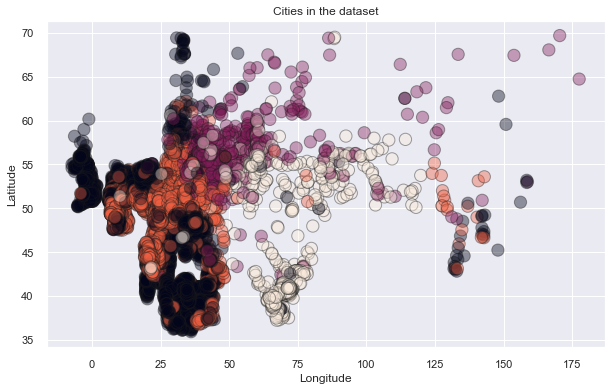

In [299]:
from matplotlib import rc, font_manager
from numpy import arange, cos, pi
from matplotlib.pyplot import figure, axes, plot, xlabel, ylabel, title, \
grid, savefig, show



fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
rs_scatter = ax.scatter(x=dfnew['lng'], y=dfnew['lat'], c=dfnew['cluster_label'], edgecolor='k', alpha=.4, s=150)
ticks_font = font_manager.FontProperties(family='Helvetica', style='normal',
    size=10, weight='normal', stretch='normal')

# set title, axis labels, background color
ax.set_title('Cities in the dataset')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# annotate each of the most visited cities on the map
bbox_style = {'boxstyle':'round', 'color':'k', 'fc':'w', 'alpha':0.8}
cities = lambda row: ax.annotate(row['city'], 
                                          xy=(row['lng'], row['lat']),
                                          xytext=(row['lng'] + 1, row['lat'] + 1),
                                          fontproperties=annotation_font,
                                          bbox=bbox_style,
                                          xycoords='data',
                                          arrowprops=arrowprops_style)
    
plt.show()

To see the number of cities in each cluster per country a heatmap is included. As seen before, the UK, Germany, and Turkey form a group with a few cities from Ukraine, Bulgaria, and Poland. The first cluster also exclusively have Russian cities. The most heterogeneous group is the third cluster, with a significant number of German cities as well as SEE and CEE countries (Poland, Romania, Serbia, and Ukraine). The last cluster contains Central Asian countries (Kazakhstan, Kyrgyztan, Tajikistan, and Uzbekistan). (The exact number of cities in each cluster is included in the table below.)

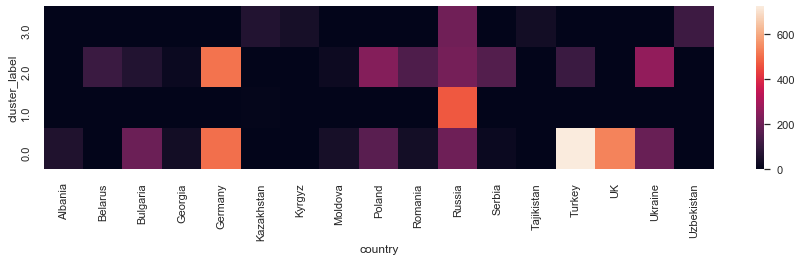

In [307]:
cluster_country_dist = dfnew[['country', 'city', 'cluster_label']].groupby(['cluster_label', 'country']).count().reset_index().pivot(index='cluster_label', columns='country', values='city').fillna(0)
fig = plt.figure(figsize=(15, 3))
ax = fig.subplots()
sns.heatmap(cluster_country_dist.iloc[::-1], ax=ax)

In [311]:
country_cluster_dist = dfnew[['country', 'city', 'cluster_label']].groupby(['cluster_label', 'country']).count().reset_index().pivot(index='country', columns='cluster_label', values='city').fillna(0)
country_cluster_dist

cluster_label    0.0    1.0    2.0    3.0
country                                  
Albania         62.0    0.0    0.0    0.0
Belarus          1.0    0.0  111.0    0.0
Bulgaria       200.0    0.0   65.0    0.0
Georgia         34.0    0.0   20.0    0.0
Germany        504.0    0.0  509.0    1.0
Kazakhstan       0.0    6.0    0.0   67.0
Kyrgyz           1.0    0.0    0.0   45.0
Moldova         45.0    0.0   23.0    0.0
Poland         168.0    0.0  241.0    0.0
Romania         38.0    1.0  147.0    0.0
Russia         204.0  469.0  215.0  208.0
Serbia          21.0    0.0  156.0    2.0
Tajikistan       2.0    0.0    0.0   36.0
Turkey         722.0    0.0  110.0    0.0
UK             534.0    0.0    1.0    0.0
Ukraine        193.0    0.0  264.0    2.0
Uzbekistan       0.0    0.0    0.0  117.0

The table below shows the mean value for each variable based on the cluster label. 

**0. Cluster**: These, mostly Western cities, seem to be relatively large and have a slight population decline (3,5% between 2000 and 2010) but a small market potential increase. 

**1. Cluster**: These smaller Russian towns seem to be stagnating both in terms of population and market potential. They appear to be relatively remote based on the distance to nearest coast and international borders.

**2. Cluster**: Eastern and Southeast European countries have the highest population loss, which is most likely due to the emigration to other EU countries after the second-last EU enlargement. These cities had a smallest increase in market potential as well. 

**3. Cluster**: On the other hand, Central Asian countries seem to be the 'winners' among all ECA countries, with a significant population increase and the highest market potential change. However, their size is also smaller than any other group's mean area size, suggesting that even though they have been expanding and growing, both economically and demographically, they are still smaller than the average city in ECA countries. 


In [313]:
dfnew[['popchange', 'area_2', 'dis_coast', 'dis_border', 'cluster_label', 'mppg_2_3', 'jantemp', 'annprecip']].groupby('cluster_label').mean()

popchange       area_2     dis_coast     dis_border  mppg_2_3  \
cluster_label                                                                  
0.0             0.965546  3286.839574  1.164728e+05  180222.759726  0.082231   
1.0             0.981277   931.472608  7.891625e+05  520876.693533  0.021767   
2.0             0.962957  2269.228881  3.534414e+05   87269.684884  0.005105   
3.0             1.071174   140.144001  1.516605e+06  168728.474281  0.121513   

                 jantemp   annprecip  
cluster_label                         
0.0            -0.421229  688.615417  
1.0           -13.778317  575.239676  
2.0            -3.311299  657.604139  
3.0           -10.573476  404.655109

The findings seem to be consistent with the typology developed by the Word Bank. We see that most Western countries belong to category 3 (growing population and declining economic activity), Russian cities into category 2 (declining population and declining economic activity), and SEE and CEE countries into category 4 (declining population and growing economic activity). And, just as we saw above, Central Asian countries belong to category 1 (growing economic activity **and** growing population). 

In [316]:
dfnew[['cluster_label', 'class_a', 'country']].groupby('cluster_label').count().reset_index().pivot(index='cluster_label', columns='class_a').fillna(0)

country                       
class_a           225    290     417     476
cluster_label                               
0.0               0.0    0.0  2729.0     0.0
1.0               0.0  476.0     0.0     0.0
2.0               0.0    0.0     0.0  1862.0
3.0             478.0    0.0     0.0     0.0

### Evaluation

To evaluate the findings a few different methods are used. First, a Silhouette Coefficient is calculated, which uses the mean intra-cluster (a) distance and the mean nearest-cluster (b) distance for each observation. It is calculated as the following: (b-a) / max(b-a) (see more details https://towardsdatascience.com/clustering-with-k-means-1e07a8bfb7ca). 

Second, a silhouette plot is included for each *k*, which shows how individual cases are clustered. The 'width' of the silhouette shows how tight the clusters are. Positive and high values indicate that the object is close to the cluster centroid, while small, or negative values that it is further away from the centroid (Kaufman and Rousseeuw, 1990). The plots show how the data is divided into groups with a varying number of *k*. Four is the most appropriate number of clusters, since if we increase *k* to five a really small class is added, which does not seem to add strengths of the analysis. With four clusters the groups are not equal in size either, however that is expected, as the sampling of cities in each region was not weighted. There are a few negative cases, which indicate that a few cities are not clustered well. This is relatively small compared to the overall number of cities in the dataset. 

Finally, the Calinski Harabasz Score is also calculated, which is an internal clustering criteria. The relatively high value indicates a relatively good fit. 


In [317]:
from sklearn import metrics
metrics.silhouette_score(df2, labels, metric = 'euclidean')

0.442102646018357

For n_clusters = 2 The average silhouette_score is : 0.7173072932694744
For n_clusters = 3 The average silhouette_score is : 0.6279078804727298
For n_clusters = 4 The average silhouette_score is : 0.442102646018357
For n_clusters = 5 The average silhouette_score is : 0.4469130421323095


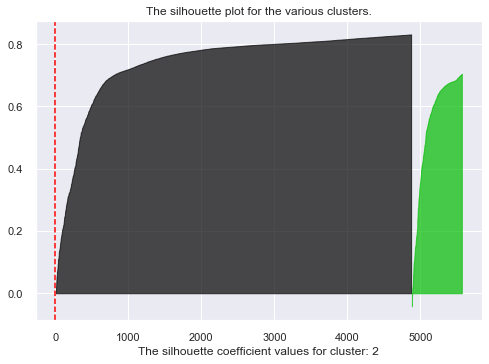

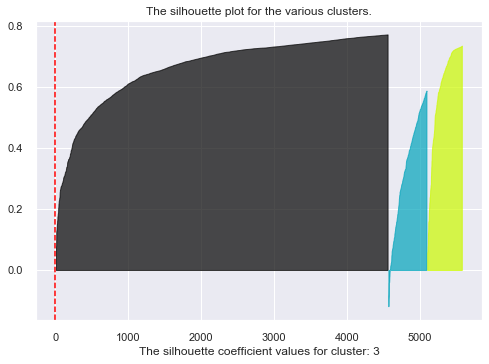

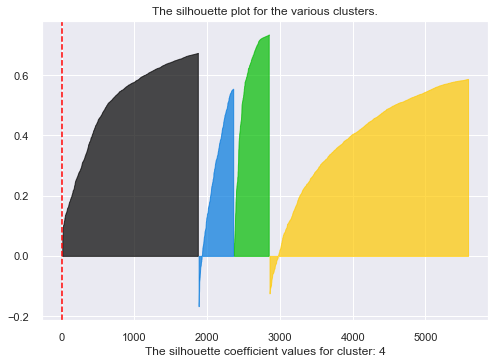

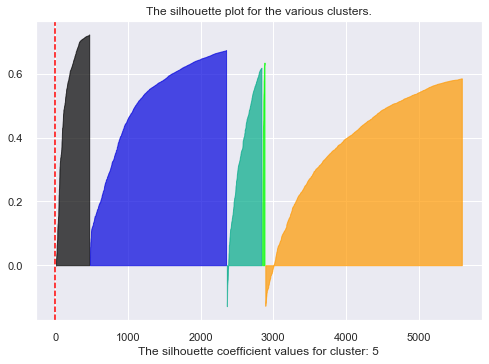

In [318]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

cluster_range = [2,3,4,5]

sse = {}
sil_coeff = {}
for n_clusters in cluster_range:
    fig, (ax1) = plt.subplots(1, 1)
    kmeans=KMeans(n_clusters=n_clusters)
    cluster_labels=kmeans.fit_predict(df2)
    sse[n_clusters] = kmeans.inertia_
    silhouette_average=silhouette_score(df2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_average)
    sample_silhouette_values=silhouette_samples(df2, cluster_labels)
    
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values= \
        sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        
        color=cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_between(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
        y_lower=y_upper +10
    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel('The silhouette coefficient values for cluster: ' +  str(n_clusters))
    ax1.axvline(x=silhouette_average, color="red", linestyle="--")    


In [388]:
metrics.calinski_harabasz_score(df2, labels)

8829.2085419209

## Conclusion

We can see that K means clustering works on the data and the resulting groups are meaningful and interpretable. 

The findings indicate convergence in the ECA region, as the once significant differences seem to be slowly reducing. Central Asian countries have been experiencing a rapid economic and demographic growth after 1991. With a conscious effort from the governments' side their former monotowns - which were primarily serving the USSR - were quickly transformed by urban redevelopment (ESCAP, 2013). The cities' rapid increase is a result of government policies, such as territorial development, shift from agrarian to industrial economies, housing policies, and city planning. However, these countries' urban population is still below 50%, which is still below the worldwide and even in SEE or CEE countries. 

Contrary to Central Asia, previously better positioned cities in Easter Europe have seen an economic and population decline. This process has been primarily driven by emigration to other EU countries. They were also hit by the 2008 financial crisis severely, similarly to Western European countries. Out of the four clusters, cities in these countries had the slowest market increase and indeed in a few countries market potential declines. This can also be due to the fact, that in Eastern and Central European countries usually there is no state level urban development and planning, which results in imbalanced and fractured urban growth (Keresztély, 2016)

The Russian cities - and in most cases monotowns - appear to be stagnating in terms of population and market potential, even though most of the cities are categories as declining on both fronts. On average population loss was less, than 2% between 2000 and 2010. These are remote (both in terms of international borders and coasts) and small cities. Even today around 13 million people live in Russian monotowns, which rely on one or a really few number of industries (UNESCO, 2019). Since these towns can quickly deteriorate and threaten the socio-political stability of the country, the Russian government adopted a strategy in 2014 to redevelop these towns and diversify their economies. It would be worthwhile to look at the results of this government plans with proceeding analyses.

As mentioned before, the most heterogeneous group among the clusters is the one with Western European countries (UK and Germany), some post-Soviet cities, and Turkey. These countries experience population loss (Turkey, Germany, the UK). However, compared to Russian cities they have significant geographic advantage, especially with regards to proximity to international markets (both borders and coasts). It would be beneficial to study these cities further to understand their similarities better. 

To sum up, we can see that urban areas in the ECA regions have experienced very different urbanisation processes which shaped their most recent experiences. Declining cities are not necessarily the ones in former USSR countries. This shift is the result of governmental urban renewal and development processes. Future research could look into this convergence process in more detail and into the urban policies in each region to try to understand the impact of state-led policies on long-term demographic and economic development. 


## References

Aldenderfer, M. S. and Blashfield, R. K. (1984), Cluster Analysis, Beverly Hills: SAGE Publications Ltd 

Caliński, T. and Harabasz, J. (1974) A dendrite method for cluster analysis, Communications in Statistics - Theory and Methods, 3:1, 1-27

Fedyuk, O. And Kindler, M. (2016), ’Migration of Ukrainians to the European Union: Background and Key Issues’, *in book: Ukrainian Migration to the European Union. Lessons from Migration Studies, Chapter: Migration of Ukrainian Nationals to Portugal: The Visibility of a New Migration Landscape*, Publisher: Springer International Publishing, Editors: Olena Fedyuk, Marta Kindler, pp.1-14

Grus, J. (2016), *K-means and hierarchical clustering with Python*, O'Reilly Media, Inc.

Jakar, G. and Dunn, J. (2019), ‘(Turning Rust into Gold?) Hamilton, Ontario and a Canadian perspective of shrinking and declining cities’, *Cities*, 94:1-10

Kaufman, L. and Rousseeuw, P.J. (1990): *Finding Groups in Data:An Introduction to Cluster Analysis*, Wiley Series

Keresztély, K. (206), 'Delayed Processes and Specific Challenges: Urban renewal in East-Central European cities' (http://www.citego.org/bdf_fiche-document-533_en.html)

Kirk, M. (2017), *Thoughtful Machine Learning with Python*, O'Reilly Media, Inc.

Maksimova, D. (2015), ’Russian Monotown’, Lund University School of Economics and Management, (http://lup.lub.lu.se/luur/download?func=downloadFile&recordOId=7374168&fileOId=7374174) [accessed 30/03/2020]

Spoor, M. (2011), ‘Multidimensional Social Exclusion and the ‘Rural-Urban Divide’ in Eastern Europe and Central Asia’, *Congress of the European Society of Rural Sociology*

Soaita, A. and Dewilde, C. (2017), ‘A cluster analysis of path-dependent changes in the housing systems of the 11 post-communist EU states’, *HOWCOME Working Paper Series* 

Tibshirani, R. et al. (2001), ‘Estimating the number of clusters in a data set via the gap statistics’, *Royal Statistical Society*, 63(2):411-423 

United Nations Educational, Scientific and Cultural Organization (UNESCO) (2019), 'Russia: From monotowns to pluritowns (https://en.unesco.org/courier/2019-2/russia-monotowns-pluritowns)

United Nations Economic and Social Commission for Asia and the Pacific (ESCAP) (2013), 'Urbanization in Central Asia: Challenges, Issues and Prospects', *Center for Economic Research* (https://www.unescap.org/sites/default/files/Urbanization-in-CA-ENG.pdf)

Word Bank (2017), 'Cities in Eastern Europe and Central Asia: A Story of Urban Growth and Decline', (https://www.worldbank.org/en/news/feature/2017/11/30/cities-in-eastern-europe-and-central-asia) [accessed 30/03/2020]